<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 02: Regresión Lineal

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Ricardo Elías Ávalos Rojas

__Rol__: 201403036-3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

## Ejercicio 1: Diabetes

Realizar análisis de regresión a los datos de diabetes disponibles en scikit-learn

In [2]:
diabetes = datasets.load_diabetes()
print(dir(diabetes))  ## Atributos

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
diabetes_df.describe(include='all').T  #Primer intento de ver que pasa, sucede que se ven cosas estandar según los percentiles

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.639623e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.309912e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.013951e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.289818e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-9.042540e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.301121e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.563971e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.863174e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.848103e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.398488e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [6]:
diabetes_df['sex']   #Se puede apreciar que los datos siempre son de dos valores, entiendo que es porque están estandarizados, como vimos en clases.

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64

In [7]:
diabetes.target #Solo ando viendo la naturaleza de los datos.
# diabetes.target.dtype #seguimos mirando los lindos datos.

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### Pregunta 1 (1 pto):

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?

Los datos de la columna sexo tienen esos valores porque estandarizo valores cuantitativos 0 y 1 para el sexo de las personas.

La columna prog es la columna a predecir.

#### Pregunta 2 (1 pto)

Realiza una regresión lineal con todas las _features_ incluyendo intercepto.

In [8]:
X = diabetes_df.drop(columns="prog").values
#X #Su X para ver que no me cambiaran los datos con esto de que las confianzas se han roto, se extiende hasta con el python. 
y = diabetes_df[("prog")].values
#y #Esta cosa me suena haberla visto en otro codigo de más arriba, este array es como un objetivo.

Ajusta el modelo

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Imprime el intercepto y los coeficientes luego de ajustar el modelo.

In [10]:
print(f"Intercept: \n{regr.intercept_}\n")
print(f"Coefficients: \n{regr.coef_}\n")

Intercept: 
152.1334841628965

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



Haz una predicción del modelo con los datos `X`.

In [11]:
y_pred = regr.predict(X)  #Me encontré este lindo codigo por ahí en una pagina
y_pred[1] #Hice una predicción.

68.07234760996171

Calcula e imprime el error cuadrático medio y el coeficiente de determinación de este modelo ajustado.

In [12]:
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(y_pred,y):.2f}\n") #recién implementado desde la pagina sklearn

# Coeficiente de determinación
print(f"Coefficient of determination: {regr.score(X, y):.2f}") 

Mean squared error: 2859.69

Coefficient of determination: 0.52


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

Dicen que peor es nada, pero este es como el informe del gobierno, malito. Con R² <0.8 se suele decir que el modelo es malo.

### Pregunta 3 (2 ptos).

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [13]:
for i in range(X.shape[1]):
    X_i = X[:, np.newaxis, i]  # Protip! Trata de entender este paso por tu cuenta, es muy clever
    regr_i = LinearRegression(fit_intercept=True)
    regr_i.fit(X_i, y)
    y_pred_i = regr_i.predict(X_i) 
    print(f"{diabetes_df.columns[i]}:")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(y_pred_i,y):.2f}")
    print(f"\tCoefficient of determination: {regr_i.score(X_i, y):.2f}\n")


age:
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

sex:
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

bmi:
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

bp:
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

s1:
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

s2:
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

s3:
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

s4:
	Coefficients: [696.88303009]
	Intercept: 152.13348416289568
	Mean squared erro

**Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

Elegiría bmi pues es el que mejor ajuste tiene, al tener el mayor R², aunque todos son malitos si que no hay mucho que hacer, quizas su tabla anova me diría que combinaciones para la regresión sería mejor, con su coeficiente de Akaike. Pero como tengo que elegir sólo una regresora, me quedo con esa.

Con la feature escogida haz el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefiera.

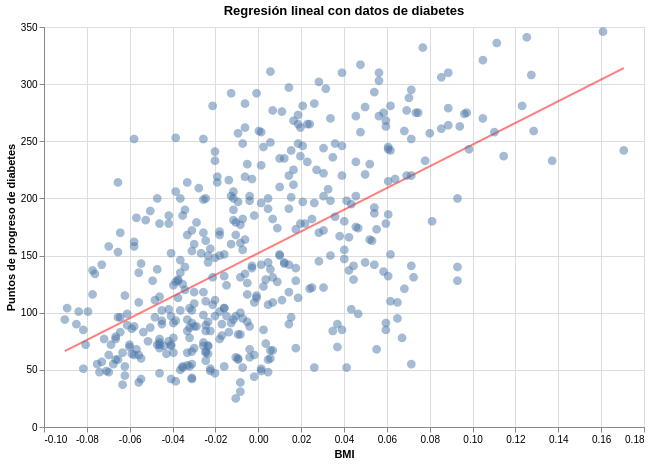

In [19]:
#Regresión
regr_bmi= LinearRegression(fit_intercept=True).fit(X[:,np.newaxis,2],y)
#Puntos
points = alt.Chart(diabetes_df).mark_circle(size=75, opacity=0.5).encode(
    x="bmi:Q",
    y="prog:Q"
).properties(
    width=600,
    height=400
)
#DF de la regresión
reg_df=(
    diabetes_df.loc[lambda x: x["bmi"].isin([x["bmi"].min(), x["bmi"].max()])
        , ["bmi"]
                   ].assign(regression=lambda x: regr_bmi.intercept_ + x['bmi']*regr_bmi.coef_)
)
#Linea
reg_line = alt.Chart(reg_df).mark_line(color="red", opacity=0.5).encode(
    x=alt.X("bmi:Q", title="BMI"),
    y=alt.Y("regression:Q",title="Puntos de progreso de diabetes")
).properties(
    title='Regresión lineal con datos de diabetes',
    width=600,
    height=400
)

reg_line+ points
#Pregunta, hay forma de hacer que el grafico quede con otro fondo?. Que tengo el tema oscuro y siento que se aprecia bien el contraste.